# Image Analyzer: ANN and Multi-Layer Perceptron

This dataset is provided by the MNIST to analyze handwritten images and predict the written number without being computionally expensive. The research question we are asking is: _"How can we efficiently analyze image data with high accuracy?"_ Using an ANN method called multi-layer perceptron, we will produce a model that will analyze written single-digit numbers.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
%matplotlib inline

Text(0.5, 1.0, 'Digit Distribution')

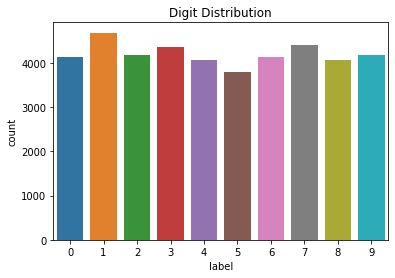

In [2]:
totalRuntime=datetime.now()
train=pd.read_csv('train.csv')
label=train['label']
train=train.drop(['label'],axis=1)
sns.countplot(label)
plt.title('Digit Distribution')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=.2, random_state=123)
stand=StandardScaler()
X_train=stand.fit_transform(X_train)
X_test=stand.fit_transform(X_test)

In [4]:
def MLPstep(data,labels,alphas,layers):
    functionTime=datetime.now()
    theModel=pd.DataFrame(columns=['Layers','Nodes','Alpha','Time','Accuracy'])
    model={}
    print('START')
    print('.'*60)
    for i in alphas:
        print('Alpha : %s' % i)
        for j in layers:
            print('Layers : %s' % j)
            stepRun=time.time()
            mlp=MLPClassifier(solver='lbfgs',alpha=i,hidden_layer_sizes=j,random_state=123)
            mlp.fit(data,labels)
            pred_mlp=mlp.predict(data)
            model['Layers']=len(j)
            model['Nodes']=j[0]
            model['Alpha']=i
            endRun=time.time()
            TIME=endRun-stepRun
            model['Time']=TIME
            print('Step time: %s'%TIME)
            model['Accuracy']=accuracy_score(labels,pred_mlp)
            theModel = theModel.append(model,ignore_index=True)
            print('-'*60)
    theModel=theModel.sort_values(by=['Accuracy'])
    functionEnd=datetime.now()
    print('Total Runtime : %s' % (functionEnd-functionTime))
    return theModel

We will test 3 different alpha levels and 8 different hidden layers and nodes combinations. The goal is to find the parameters that give high accuracy and a reduced output time.

In [5]:
alpha=[1e-3,.1,1]
layers=[[10,10],[20,20],[10,10,10,10,10],[20,20,20,20,20],
        [100,100],[200,200],[100,100,100,100,100],[200,200,200,200,200]]
model1=MLPstep(X_train,y_train,alpha,layers)

START
............................................................
Alpha : 0.001
Layers : [10, 10]
Step time: 11.369667768478394
------------------------------------------------------------
Layers : [20, 20]
Step time: 12.070636987686157
------------------------------------------------------------
Layers : [10, 10, 10, 10, 10]
Step time: 13.217147827148438
------------------------------------------------------------
Layers : [20, 20, 20, 20, 20]
Step time: 23.99814796447754
------------------------------------------------------------
Layers : [100, 100]
Step time: 23.560704946517944
------------------------------------------------------------
Layers : [200, 200]
Step time: 35.941214084625244
------------------------------------------------------------
Layers : [100, 100, 100, 100, 100]
Step time: 53.93859934806824
------------------------------------------------------------
Layers : [200, 200, 200, 200, 200]
Step time: 101.53645086288452
------------------------------------------------

In [6]:
model1

,Layers,Nodes,Alpha,Time,Accuracy
18,5.0,10.0,1.000,13.092884,0.955268
10,5.0,10.0,0.100,13.358120,0.959345
2,5.0,10.0,0.001,13.217148,0.963839
8,2.0,10.0,0.100,9.854304,0.981875
0,2.0,10.0,0.001,11.369668,0.983155
16,2.0,10.0,1.000,9.989335,0.983423
11,5.0,20.0,0.100,23.840133,0.999673
19,5.0,20.0,1.000,22.889071,0.999762
3,5.0,20.0,0.001,23.998148,0.999762
9,2.0,20.0,0.100,11.414195,0.999970


Initially, the other solver methods, _'adam'_ and _'sgd'_, were also tested, but with the amount of variables, it took too much computaional time to complete all 3 solver methods, so I opted for the quickest one, which was _'lbfgs'_.

Based on the table above, we will use an alpha level of 0.001 and 2 hidden layers with 200 nodes in each layer. This yielded a fast computation time and high accuracy in the training data.

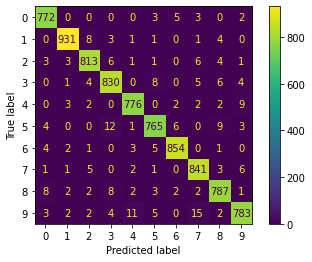

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       785
           1       0.99      0.98      0.98       949
           2       0.97      0.97      0.97       838
           3       0.96      0.97      0.96       858
           4       0.97      0.97      0.97       796
           5       0.97      0.96      0.96       800
           6       0.98      0.98      0.98       870
           7       0.96      0.98      0.97       860
           8       0.96      0.96      0.96       817
           9       0.97      0.95      0.96       827

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Accuracy: 0.9704761904761905


In [7]:
mlp=MLPClassifier(solver='lbfgs',alpha=.001,hidden_layer_sizes=(200,200),random_state=123)
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
CMD=ConfusionMatrixDisplay(cm)
CMD.plot()
plt.show()
print(classification_report(y_test,y_pred))
print("Accuracy: %s" % accuracy_score(y_test,y_pred))

In [8]:
endTIME=datetime.now()
print('Total Runtime : %s' % (endTIME-totalRuntime))

Total Runtime : 0:14:28.316512
